# Tutorial

This notebook replicates some of the examples from Coles (2001): An Introduction to Statistical Modeling of Extreme Values.

In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
from caseva.models import BlockMaximaModel, ThresholdExcessModel

In [6]:
# Define input data location.
PATH_ROOT = Path().resolve().parent
PATH_DATA = PATH_ROOT / "data"

### Example 1: Annual Maximum Sea Levels at Port Pirie

Fitting a GEV model to annual maximum sea level rise data.
Coles (2001) p.59 example 3.4.1.

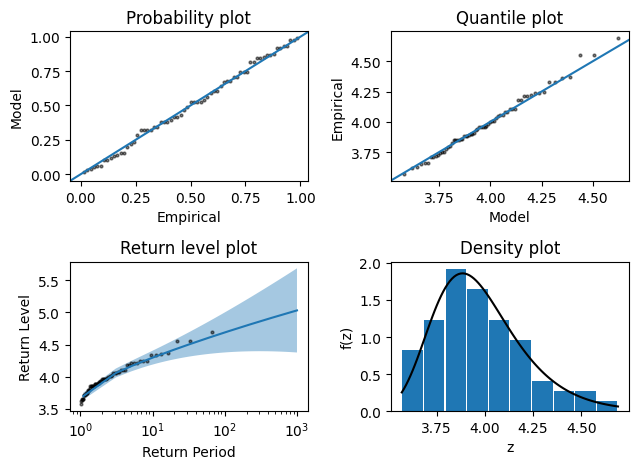

In [7]:
# Load data
data = pd.read_csv(PATH_DATA / "portpirie.csv")
extremes = data["SeaLevel"]

# Fit model
model = BlockMaximaModel(max_optim_restarts=1)
model.fit(data=extremes)

# Evaluate
model.diagnostic_plot()

### Example 2: Glass Fiber Strength Example (block minima)

Fitting a GEV model to glass fiber breaking strength data.
Coles (2001) p.64 example 3.4.2.

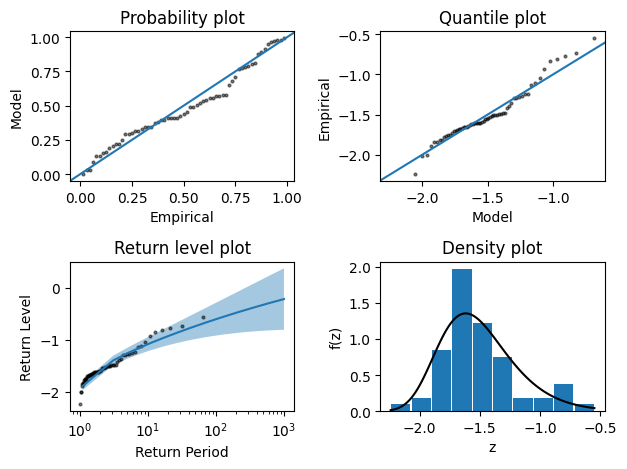

In [8]:
# Load data
data = pd.read_csv(PATH_DATA / "glass.csv")
extremes = -data["Strength"]  # Block minima!

# Fit model
model = BlockMaximaModel(max_optim_restarts=10)
model.fit(data=extremes)

# Evaluate
model.diagnostic_plot()

### Example 3: Daily Rainfall Data

Fitting a GPD model to daily rainfall data.
Coles (2001) p.84 example 4.4.1.

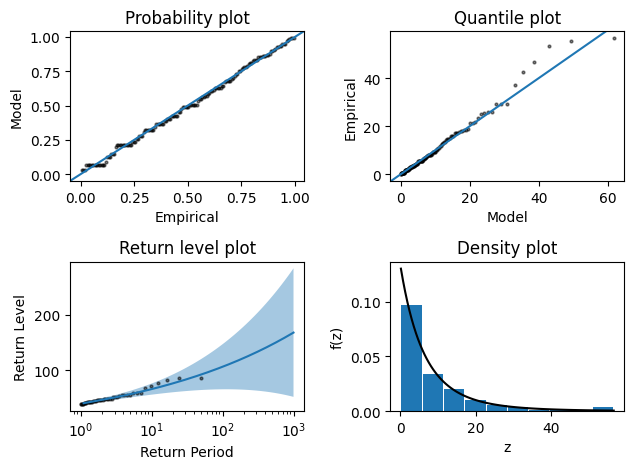

In [9]:
# Load data / define threshold
data = pd.read_csv(PATH_DATA / "rain.csv", parse_dates=[0])
years = {date.year for date in data["Date"]}
num_years = max(years) - min(years) + 1
threshold = 30

# Fit model
model = ThresholdExcessModel(max_optim_restarts=10)
model.fit(data=data["Rainfall"], threshold=threshold, num_years=num_years)

# Evaluate
model.diagnostic_plot()

### Example 4: Dow Jones Index Series

Fitting a GPD model to transformed stock index data.
Coles (2001) p.86 example 4.4.2.

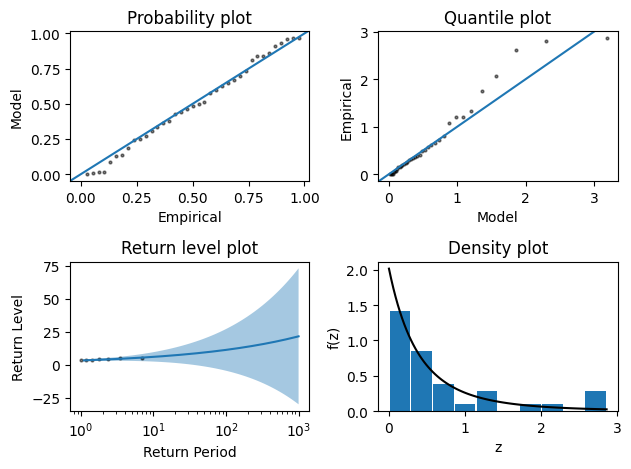

In [10]:
# Load / transform data
data = pd.read_csv(PATH_DATA / "dowjones.csv", parse_dates=["Date"])
years = {date.year for date in data["Date"]}
num_years = max(years) - min(years) + 1
threshold = 2

# Log transformation makes the data approximately stationary.
transdormed_data = 100. * np.diff(np.log(data["Index"]))

# Fit model
model = ThresholdExcessModel()
model.fit(data=transdormed_data, threshold=threshold, num_years=num_years)

# Evaluate
model.diagnostic_plot()